In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Adam, Adadelta, Adagrad, RMSprop
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

In [84]:
X = pd.read_csv('train.csv', index_col='id')

In [85]:
df_test = pd.read_csv('test.csv', index_col='id')

In [86]:
sex_dummies = pd.get_dummies(X['Sex'])

In [87]:
sex_dummies_test= pd.get_dummies(df_test['Sex'])

In [88]:
#df = df.join(sex_dummies)

In [89]:
df_test = df_test.join(sex_dummies_test)

In [90]:
#X = df.copy()
#X.drop(['Sex', 'Age'], axis=1, inplace=True)

In [91]:
X_test = df_test.copy()
#X_test.drop(['Sex'], axis=1, inplace=True)

In [92]:
X.drop(X[X['Height'] <= 0].index, axis=0, inplace=True)

In [93]:
y = X['Age']

In [94]:
X.drop(['Sex'], axis=1, inplace=True)

In [95]:
X['shucked_w_ratio'] = X['Shucked Weight'] / X['Weight']
X['viscera_w_ratio'] = X['Viscera Weight'] / X['Weight']
X['shell_w_ratio'] = X['Shell Weight'] / X['Weight']

X['height_w_ratio'] = X['Height'] / X['Weight']
X['len_w_ratio'] = X['Length'] / X['Weight']
X['diameter_w_ratio'] = X['Diameter'] / X['Weight']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
discrete_features = np.array(X.columns)

In [98]:
corr_matrix = X.corr().round(2)

<AxesSubplot:>

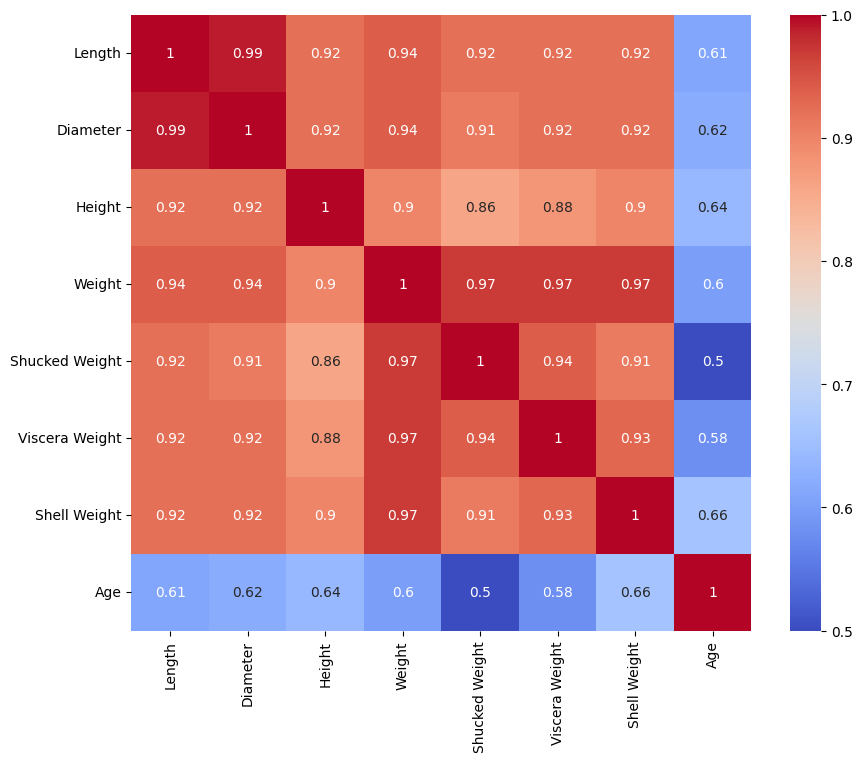

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [18]:
i = Input(shape=(X.shape[1],))
x = BatchNormalization()(i)
#x = Dropout(0.4)(i)
x = Dense(100, activation='relu')(x)
#x = BatchNormalization()(i)
x = Dropout(0.4)(x)
x = Dense(70, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(50, activation='relu')(x)
x = Dense(1)(x)

model = Model(i, x)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss='mse', optimizer=Adam(lr=0.0001), metrics=['mae'])

In [20]:
r = model.fit(X_train, y_train, validation_data=[X_test, y_test], batch_size=64, epochs=40)

Instructions for updating:
Use tf.cast instead.
Train on 55520 samples, validate on 18507 samples
Epoch 1/40
55520/55520 [==============================] - 1s 21us/step - loss: 25.9049 - mae: 3.8511 - val_loss: 10.1760 - val_mae: 1.7371
Epoch 2/40
55520/55520 [==============================] - 1s 18us/step - loss: 9.0906 - mae: 2.2310 - val_loss: 7.6805 - val_mae: 1.5530
Epoch 3/40
55520/55520 [==============================] - 1s 18us/step - loss: 7.9987 - mae: 2.0825 - val_loss: 6.4272 - val_mae: 1.5004
Epoch 4/40
55520/55520 [==============================] - 1s 19us/step - loss: 7.4620 - mae: 1.9912 - val_loss: 5.9605 - val_mae: 1.4625
Epoch 5/40
55520/55520 [==============================] - 1s 18us/step - loss: 6.9707 - mae: 1.9133 - val_loss: 5.5718 - val_mae: 1.4972
Epoch 6/40
55520/55520 [==============================] - 1s 18us/step - loss: 6.7031 - mae: 1.8684 - val_loss: 5.0389 - val_mae: 1.4421
Epoch 7/40
55520/55520 [==============================] - 1s 17us/step - loss:

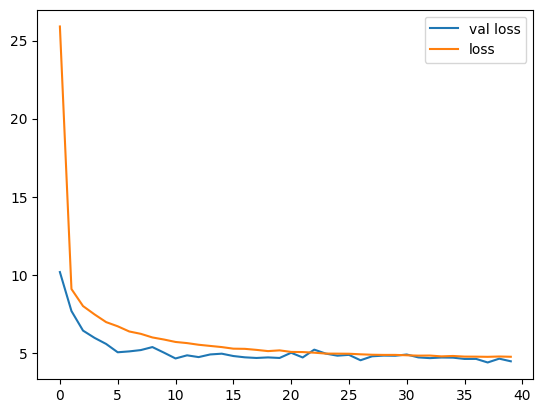

In [21]:
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['loss'], label='loss')
plt.legend()

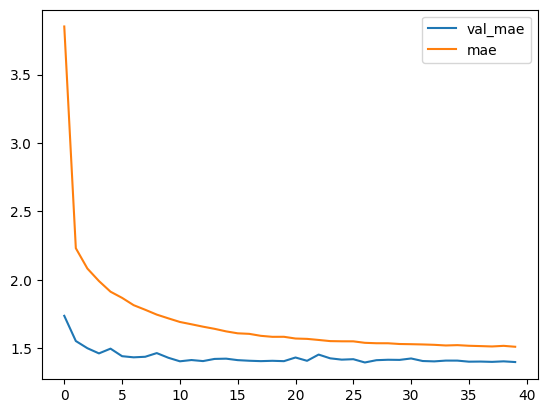

In [22]:
plt.plot(r.history['val_mae'], label='val_mae')
plt.plot(r.history['mae'], label='mae')
plt.legend()

In [23]:
model.predict(X_test)

array([[ 5.9380045],
       [10.652456 ],
       [10.381249 ],
       ...,
       [ 9.38521  ],
       [ 9.377115 ],
       [ 7.263685 ]], dtype=float32)

In [24]:
y_test

id
48656     7
69441    10
28116    12
21305    11
27729     7
         ..
14119     7
25741    10
33039     9
17327     8
56542     7
Name: Age, Length: 18507, dtype: int64